In [1]:
import numpy as np
#import os

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#os.chdir("/content/drive/MyDrive/Colab Notebooks/ass1")

In [ ]:
#data = np.genfromtxt('PCB.dt', delimiter='\t')
#print(data)

Now we split that data into inputs and labels. We would like the inputs to be represented as a matrix (and not just a vector), therefore we reshape them:

In [ ]:
#x = data[...,0].reshape(-1, 1)  # Take first column, and reshape it to 2D vector
#y = data[...,1]  # Take second column
#print("x:", x)
#print("y:", y)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("PCB.dt", sep='\t', header=None, names=['X', 'Y'])

In [4]:
df = df.sort_values(by='X')

In [5]:
array1 = np.ones((28,1)) # gen 1
x = df['X'].to_numpy().reshape(-1, 1)
x1 = np.hstack((x,array1)) # add 1 to matrix x

xsqrt = np.sqrt(x) # x -> sqrt(x) 
xsqrt1 = np.hstack((xsqrt,array1)) # add 1 to matrix sqrt(x)

y = df['Y'].to_numpy().reshape(-1, 1)
yln = np.log(y) # y -> lny

print(x.shape)
print(yln.shape)

(28, 1)
(28, 1)


### Fit regression model
This you have to figure out yourself.

In [6]:
def reg(x, y):
    xstar = np.dot(np.linalg.pinv(np.dot(x.T,x)),x.T) #Moore-Penrose pseudo-inverse.
    wmin = np.dot(xstar,y)
    return wmin

In [7]:
########### Linear Regression ###########
lg = reg(x1,yln)
w = lg[0][0]
b = lg[1][0]
yhat = w * x + b
print(w,b)

0.25912823956407127 0.0314724697144767


In [8]:
########### non-Linear Regression ###########
lg2 = reg(xsqrt1,yln)
w2 = lg2[0][0]
b2 = lg2[1][0]
yhat2 = w2 * xsqrt + b2

In [9]:
########### MSE ###########
def mse(x, y):
    n = x.shape[0]
    MSErr = np.sum((x - y)**2)/n
    return MSErr

In [10]:
mse1 = mse(yln,yhat)
print('MSE for the first modle',mse1)

mse2 = mse(yln,yhat2)
print('MSE for the second modle',mse2)

MSE for the first modle 0.29853492489386174
MSE for the second modle 0.23772496260048076


In [12]:
def computeR2(y, yhat):
    n = x.shape[0]
    sse = np.sum((y - yhat) ** 2)
    sst = np.sum((y - np.mean(y)) ** 2)
    R2 = 1 - sse / sst  
    return R2

In [13]:
Rsq1 = computeR2(yln, yhat)
print('R^2 for the first modle',Rsq1)

Rsq2 = computeR2(yln, yhat2)
print('R^2 for the second modle',Rsq2)

R^2 for the first modle 0.7313915439623446
R^2 for the second modle 0.7861056451320498


In [ ]:
#from sklearn.metrics import r2_score # test 
#r=r2_score(yln, yhat)
##print('right') if r == Rsq else print('wrong')

In [14]:
import matplotlib.pyplot as plt
#import seaborn as sns

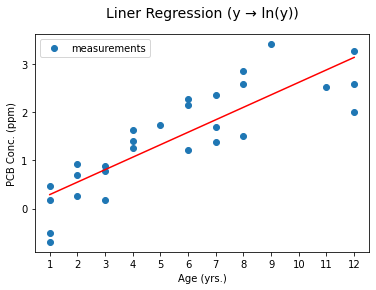

In [15]:
fig, ax = plt.subplots()
ax.plot(x, yln, 'o', label='measurements')
plt.plot(x, yhat,'r')
ax.set_xlabel('Age (yrs.)')
ax.set_ylabel('PCB Conc. (ppm)')
plt.xticks(np.arange(1, 13, step=1))
ax.set_title('Liner Regression (y → ln(y))', fontsize=14, position=(0.5,1.05))
ax.legend();
fig.savefig('Assignment1_Question6_Plot1.pdf')
plt.show()

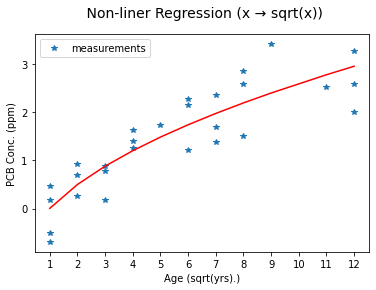

In [16]:
fig2, ax2 = plt.subplots()
ax2.plot(x, yln, '*', label='measurements')
plt.plot(x, yhat2,'r')
ax2.set_xlabel('Age (sqrt(yrs).)')
ax2.set_ylabel('PCB Conc. (ppm)')
plt.xticks(np.arange(1, 13, step=1))
ax2.set_title(' Non-liner Regression (x → sqrt(x))', fontsize=14, position=(0.5,1.05))
ax2.legend();
fig2.savefig('Assignment1_Question6_Plot2.pdf')
plt.show()

Figures should be shown in your report, it is not sufficient to have them in a notebook. Thus, we save the figure:

In [ ]:
#fig.savefig('Assignment1_Question6_Plot1.pdf')